# Radial Basis Function Network

In [1]:
import numpy as np
from math import exp

In [2]:
np.arange(-10,10, 2)

array([-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8])

In [25]:
class RBF:
    def __init__ (self, train, test, train_target, test_target, learning_rate):
        self.train_data = train
        self.test_data = test
        self.train_target = train_target
        self.test_target = test_target
        self.learning_rate = learning_rate
    
    def regression (self, centers, variance, epoch):
        self.centers = centers
        self.variance = variance
        self.weights = np.random.randint(-100,100,(self.centers.shape[0] + 1))/100
        out = np.zeros(self.train_data.shape[0])
        for i in range (epoch):
            for j in range(self.train_data.shape[0]):
                #print (self.train_data[j])
                kernel_output = self.kernel(self.train_data[j])
                error, out[j] = self.output_layer(kernel_output, self.train_target[j])
                self.weights = self.updating (error, kernel_output)
                
                #print ("_____________________________________________________")
        return out

    def kernel (self, data):
        result = np.zeros(self.centers.shape[0])
        for i in range (self.centers.shape[0]):
            result[i] = exp((-(data-self.centers[i])**2)/(2*self.variance))
        return result
    
    def output_layer (self, kout, target):
        result = 0
        for i in range (self.weights.shape[0]):
            if i==0:
                result += self.weights[i]                
            else: result += self.weights[i] * kout[i-1]
        #result = 1/(1 + exp(-result))
        error = target - result
        return error, result
    
    def updating (self, error, kout):
        new_weights = np.zeros (self.weights.shape[0])
        for i in range (self.weights.shape[0]):
            if i==0:
                #print (error, self.weights[i])
                new_weights[i]  = self.weights[i] + (self.learning_rate * error)
            else:
                #print ( kout, error, self.weights[i])
                new_weights[i] = self.weights[i] + (self.learning_rate * error * kout[i-1])
        return new_weights     
    def prediction (self):
        output = np.zeros(self.test_data.shape[0])
        e = np.zeros(self.test_data.shape[0])
        for j in range(self.test_data.shape[0]):
            #print('test',self.test_data[j])
            kernel_output = self.kernel(self.test_data[j])
            #print(kernel_output)
            e[j], output[j] = self.output_layer(kernel_output, self.test_target[j]) 
        return e, output

In [4]:
def calculate_target (array):
    target = np.zeros (array.shape[0])
    for i  in range (array.shape[0]):
        target[i] = (0.05*((array[i])**3))-(0.2*((array[i])**2))-(3*array[i])+20
    return target

In [58]:
centers = np.arange (-10, 10, 3)
print(centers.shape[0])
test = np.arange (-15, 15, 1)
train = np.arange (-10, 10, 0.5)
target_test = calculate_target (test)
target_train = calculate_target (train)
print (test.shape)
rbf = RBF(train, test, target_train, target_test, 0.1)
to = rbf.regression(centers, 6, 10000)

error, out = rbf.prediction()

7
(30,)


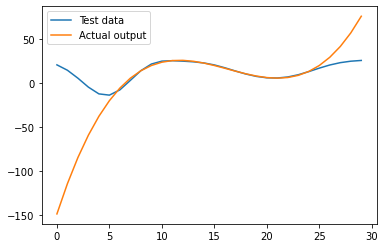

In [59]:
import matplotlib.pyplot as plt
plt.plot(out, label='Test data')
plt.plot(target_test, label='Actual output')
plt.legend()
plt.show()

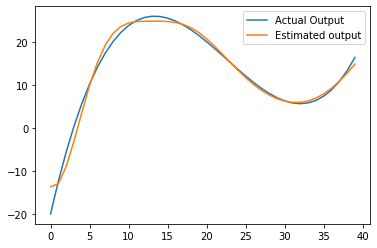

In [60]:
z = np.zeros(centers.shape[0])
z [:]=-20
#plt.scatter(centers, z , label='Centers')
plt.plot(target_train, label='Actual Output')
plt.plot (to, label = 'Estimated output')
plt.legend()
plt.show()